In [1]:
# load necessary librries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load dataset and show 10 instances
wine_raw=pd.read_csv("C:/Users/yzcvo/Desktop/DS5500/real world data seience application/winemag-data-130k-v2.csv")
wine_raw.head(10)

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


After I load the dataset and have a basic view about each columns,I find there exists some data cleaning tasks before I apply machine learning alogrithm on it.

The first task is drop the unnamed column,this column is the id in original dataset but we are no longer need it since pandas already provides the index.

The second task is to drop the taster_twitter_handle and title column,this column record the twitter of each taster and it provides the same information as the taster_name column.The same reason for dropping the title column.

The third task is fill NAN in catagory columns with "not_known" and drop lines with NA in price column.

In [3]:
# data cleaning section
# drop Unnamed: 0,taster_twitter_handle and title column
wine_review=wine_raw.drop(["Unnamed: 0",'region_1','region_2',"taster_name","taster_twitter_handle","title","winery"],axis=1)
# find all observations have NAN and replace it with not_known and drop lines with NA in price and point column.
wine_review=wine_review[wine_review['price'].notnull()]
wine_review=wine_review.fillna('not_known')
wine_review.head(10)

,country,description,designation,points,price,province,variety
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,Portuguese Red
2,US,"Tart and snappy, the flavors of lime flesh and...",not_known,87,14.0,Oregon,Pinot Gris
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Riesling
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Pinot Noir
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Tempranillo-Merlot
6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Frappato
7,France,This dry and restrained wine offers spice in p...,not_known,87,24.0,Alsace,Gewürztraminer
8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,Gewürztraminer
9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Pinot Gris
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Cabernet Sauvignon


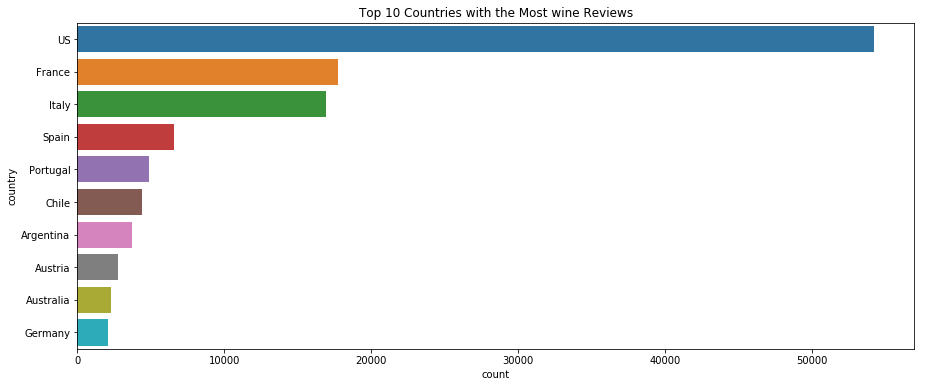

In [4]:
# visualization 1: Which country's wine has the most record in this dataset
fig,ax = plt.subplots(figsize=(15,6))
country_count = wine_review['country'].value_counts()
plt.title('Top 10 Countries with the Most wine Reviews')
count_plot = sns.countplot(
    data=wine_review,
    y='country',
    order=country_count.index[:10],
    ax=ax
)
plt.show(count_plot)

My first visualization is a bar plot.This plot want to discover the distribution of wine review for different countries.In this plot I use the bar as avisual encoding and the lengeth of the bar as channel to control the visual encoding.The color in this plot is represent different countries and mke this plot more colorful.

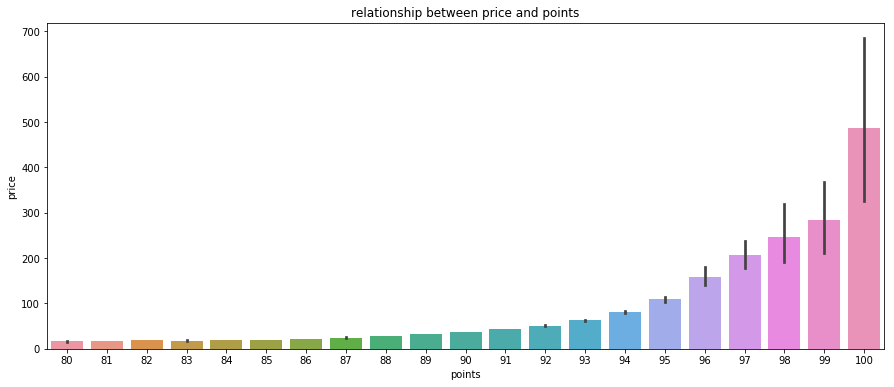

In [5]:
# visualization 2:find the correlation between price and points
ax=plt.subplots(figsize=(15, 6))
plt.title("relationship between price and points")
ax = sns.barplot(x="points", y="price",data=wine_review)
plt.show()

My second plot is to discover the relationship between points feature and price feature.The bar in this plot means the average wine price under a given point and the line represent the range of wine price under a given point.The length of bar and line is the channel to control the visual encoding and the color in this plot is just decoration and without actual meaning.

In [6]:
# data preprocessing section
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.decomposition import TruncatedSVD 
# task 0:generate a small subset of wine review by random sampling
sampled_wine = wine_review.sample(n = 20000).reset_index(drop = True)
# task 1:encode catagorical columns by one-hot encoding
encoded_data=pd.get_dummies(sampled_wine,columns=['country','designation','province','variety'])

In [7]:
# task 2:using tfidf vectorizer to get features from description column,then applying SVD on it
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize 
# remove stop words in the description column
stop_words = set(stopwords.words('english'))
for i in range(len(encoded_data)):
    rawdata=encoded_data.loc[i,"description"]
    tokenized_des=word_tokenize(rawdata)
    cleaned_sentence=[]
    for words in tokenized_des: 
        if words not in stop_words: 
            cleaned_sentence.append(words) 
    encoded_data.loc[i,"description"]="".join(cleaned_sentence)
    if(i % 5000 == 0):
        print(i)
# tfidf to vecotrize the description column
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(encoded_data["description"])
# perform SVD on X to reduce the dimension
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
svd.fit(X)  
svd_description=svd.transform(X)
# drop description column and replced with dimension reduced singular value
for i in range(np.shape(svd_description)[1]):
    encoded_data[str(i+1)] = svd_description[:, i]
encoded_data=encoded_data.drop("description",axis=1)

0
5000
10000
15000


In [8]:
# task 3:split the dataset into 2 parts,80 for training and 20 for testing
from sklearn.model_selection import train_test_split
X_train, X_test= train_test_split(encoded_data ,test_size=0.2, random_state=42)

In [9]:
# task 4:standardize price column in training part
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X_train['price'].reshape(-1,1))
X_train['price']=scaler.transform(X_train['price'].reshape(-1,1))
point_train=X_train['points']
X_train=X_train.drop("points",axis=1)
point_test=X_test['points']
X_test=X_test.drop("points",axis=1)

C:\anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until
C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.
C:\anaconda\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In data preprocessing section,I completed 4 different tasks.

The first one is encode catagorical features like country,designation and so on it to binary codings by one hot-encoding.That is because regression algorithm cannot deal with catagorical data directly and we need to preprocess it

The second task is using tfidf to mining features from description and use SVD to reduce the dimension.The description column is a text column and we need to get features from it.And the tridf matrix's dimension is too big and I use SVD to reduce the dimension on it.

The third task is apply a train test split,this is simple and I use 80% for training and 20% for testing

The last task is standardization the numerical column,the points is the taget feature so we only need to standardize the price column.

In [10]:
# load scikit-learn package for machine learnig part
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

I will choose lasso regression,random forest regression and SVR for this assignment and All of these three algorithm is from scikit-learn.The target value is points column and the rest columns are the feature columns

In [13]:
# Apply ML algorithm on training part and compare the result
# task 1:tuning optimal hyperparameters with 10-fold cross validation 
# linear regression:The lasso regression only has one hyperparameter,the learning rate alpha 
lasso_score=[]
for i in range(1,10):
    lasso=Lasso(alpha=i/10)
    scores = cross_val_score(lasso, X_train, point_train, cv = 10, scoring = "neg_mean_squared_error")
    lasso_score.append(np.sqrt(np.abs(scores)))
    print(i)

1
2
3
4
5
6
7
8
9


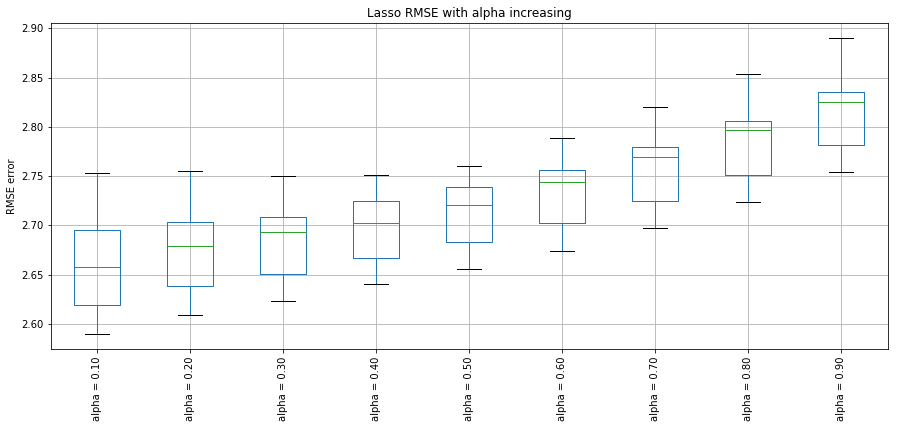

In [16]:
# # Visualization 3:Lasso regression
lasso_scores_df = pd.DataFrame()
for score, alpha in zip(lasso_score, range(1, 11)):
    lasso_scores_df["alpha = %.2f" % (alpha / 10)] = score
axes = lasso_scores_df.boxplot(figsize = (15, 6), rot = 90)
axes.set_ylabel("RMSE error")
axes.set_title("Lasso RMSE with alpha increasing")
plt.show()

In [12]:
# Ridge regression:I will search on alpha to get the best hyper parameters
# tuning hyperparameters
ridge_score = []
for i in range(50, 100, 5):
    ridge = Ridge(alpha = i/10)
    scores = cross_val_score(ridge, X_train, point_train, cv = 10, scoring = "neg_mean_squared_error")
    ridge_score.append(np.sqrt(np.abs(scores)))
    if(i % 10 == 0):
        print(i)

50
60
70
80
90


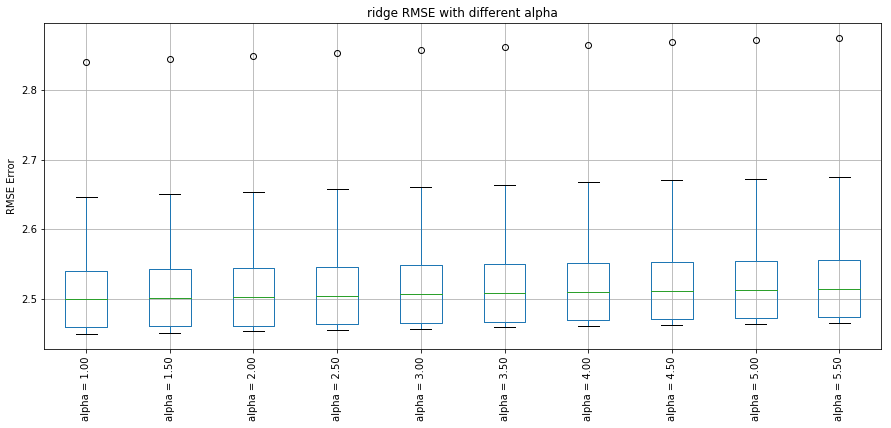

In [13]:
# Visualization 3:Ridge regression
ridge_scores_df = pd.DataFrame()
for score, alpha in zip(ridge_score,range(10, 100, 5)):
    ridge_scores_df["alpha = %.2f" % (alpha / 10)] = score
axes = ridge_scores_df.boxplot(figsize = (15, 6), rot = 90)
axes.set_ylabel("RMSE Error")
axes.set_title("ridge RMSE with different alpha")
plt.show()

In [14]:
# random forest:I will search the number of tree estimators
RFscore=[]
for i in range(10,100,10):
    RF_trees=RandomForestRegressor(n_estimators = i)
    scores = cross_val_score(RF_trees, X_train, point_train, cv = 10, scoring = "neg_mean_squared_error")
    RFscore.append(np.sqrt(np.abs(scores)))
    print(i)

10
20
30
40
50
60
70
80
90


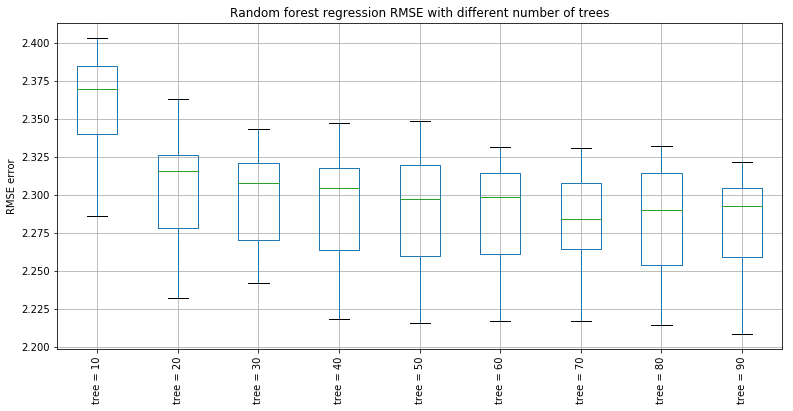

In [15]:
# Visualization 3:Random Forest
RFR_scores_df = pd.DataFrame()
for score, tree in zip(RFscore, range(10, 110, 10)):
    RFR_scores_df["tree = %d" % tree] = score
axes = RFR_scores_df.boxplot(figsize = (13, 6), rot = 90)
axes.set_ylabel("RMSE error")
axes.set_title("Random forest regression RMSE with different number of trees")
plt.show()

In the machine learning part I choose three different machine learning method.For Lasso regression and random forest regression.I search the optimal hyperparameter by a fixed interval and for SVR I tried different possible value of the hyperparameter.The quelity of the regression model is evaluated by the Average RMSE error.

There are 3 different plots in Visualization 3.I use boxplot as a visual encoding of RMSE error.Because the boxplot can not only show the average of RMSE error and it can also show the distribution of RMSE error.Here the length of the box and the vertical position are channels control the visual encodings and I found the result generated by Random forest is far better than other models.

In [30]:
# Testing section
from sklearn.metrics import mean_squared_error
lasso = Lasso(alpha = 0.1)
ridge=Ridge(alpha=1)
RF = RandomForestRegressor(n_estimators = 10)
# Lasso
lasso.fit(X_train, point_train)
lasso_predict = lasso.predict(X_test)
# ridge
ridge.fit(X_train, point_train)
ridge_predict = ridge.predict(X_test)
# Random Forest
RF.fit(X_train, point_train)
RF_predict = RF.predict(X_test)
# evaluate it with RMSE error
print("Lasso Regression Test RMSE: %.2f" % np.sqrt(mean_squared_error(lasso_predict, point_test)))
print("Ridge Regression Test RMSE: %.2f" % np.sqrt(mean_squared_error(ridge_predict, point_test)))
print("RF Regression Test RMSE: %.2f" % np.sqrt(mean_squared_error(RF_predict,point_test)))


Lasso Regression Test RMSE: 51.73
Ridge Regression Test RMSE: 39.06
RF Regression Test RMSE: 7.80


After each model return the result of predicted points Value.I use RMSE and R2 as measurements to evaluate theese models.And I find the Random Forest regression has the smallest R2 value and RMSE error,So RF has the best performance among these three models.

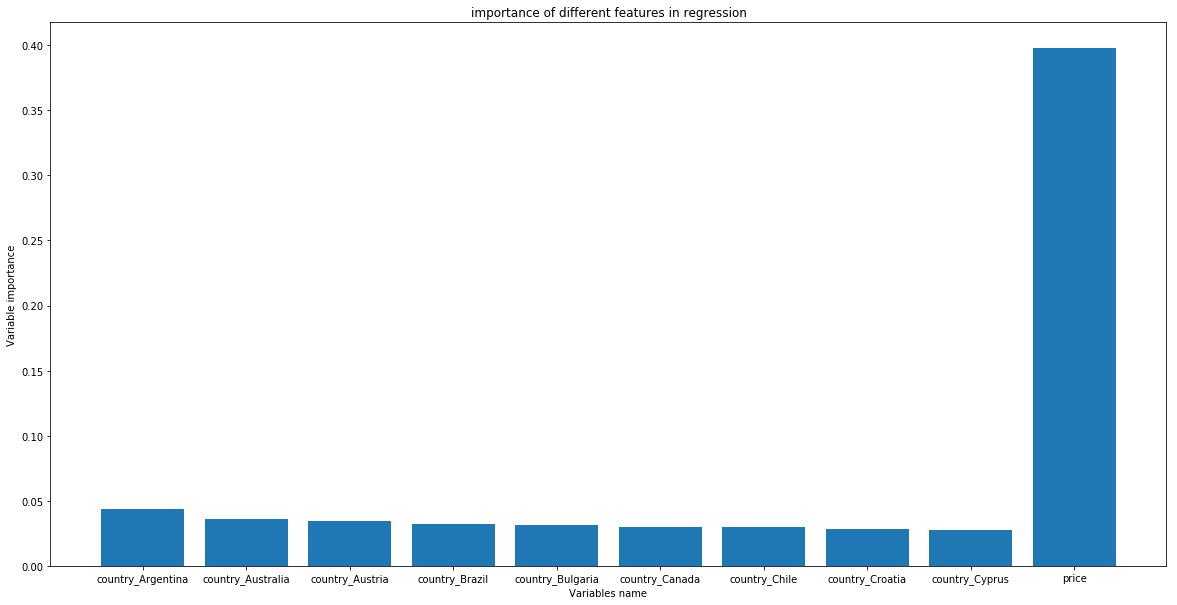

In [42]:
# visualization 4:
feature_importance = RF.feature_importances_
feature_list = list(X_train.columns.values)
# rescale the featire importance matrix and choose the top 10 most important feature
sorted_feature = np.flip(np.argsort(feature_importance)[-10:], axis = 0)
sorted_name=feature_list[0:10]
plt.figure(figsize=(20,10))
plt.bar(sorted_name, feature_importance[sorted_feature])
plt.title("importance of different features in regression")
plt.xlabel("Variables name")
plt.ylabel("Variable importance")
plt.show()

In visualization 4 I choose bar chart as visual encoding to represent different feature importance.The area covered by the bar is tha mark and the height of the bar is the channel.I fiind the most important featire in this plot is the price